# Simulator

This notebook gives examples of how to use simulators.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import simulator

## Constant-elasticity of variance

In [2]:
# 1) Constant parameters
prices = simulator.cev(
    N=10, T=252,
    mu=0.08, sigma=0.25, beta=0.7,
    S0=100, dt=1/252,
    scheme="milstein", boundary="truncate",
    seed=42
)

# 2) Time-varying
T = 252
t = np.arange(T)
sigma_t = 0.20 + 0.05*np.sin(2*np.pi*t/T)   # 20% ± 5% seasonal vol
beta_t  = 0.85 + 0.10*np.cos(2*np.pi*t/T)   # elasticity between ~0.75–0.95

prices_tv = simulator.cev(
    N=10, T=T,
    mu=0.06, sigma=sigma_t, beta=beta_t,
    S0=100, dt=1/252,
    scheme="euler", boundary="absorb",
    seed=7
)


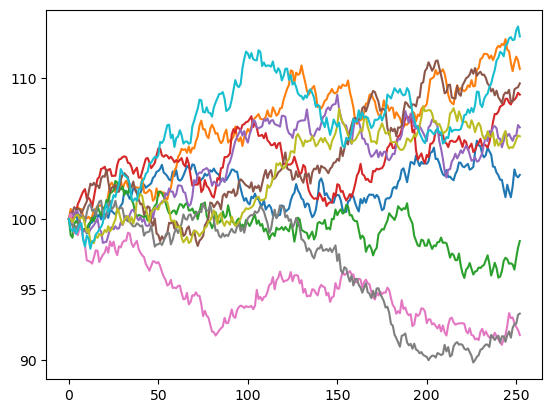

In [3]:
plt.plot(prices.T)
plt.show()

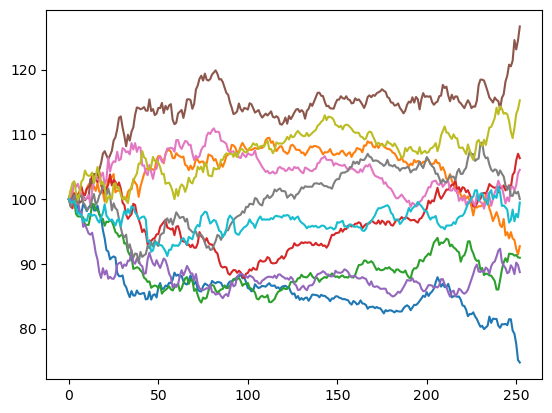

In [4]:
plt.plot(prices_tv.T)
plt.show()

## Merton Jump-Diffusion Model

In [5]:
# 1) Constant parameters, daily steps for 1 year
prices = simulator.merton(
    N=10, T=252,
    mu=0.08, sigma=0.2,
    lamb=0.5,          # average 0.5 jumps per year
    mJ=-0.1, sJ=0.2,   # negative-mean log jump -> downside bias
    S0=100, dt=1/252, adjust_drift=True, seed=42
)

# 2) Time-varying jump intensity and diffusion vol
T = 252
lamb_t  = 0.3 + 0.2*np.sin(2*np.pi*np.arange(T)/T)
sigma_t = 0.18 + 0.07*np.cos(2*np.pi*np.arange(T)/T)
prices_tv = simulator.merton(
    N=10, T=T, mu=0.07, sigma=sigma_t, lamb=lamb_t,
    mJ=-0.12, sJ=0.25, S0=100, dt=1/252, seed=7
)

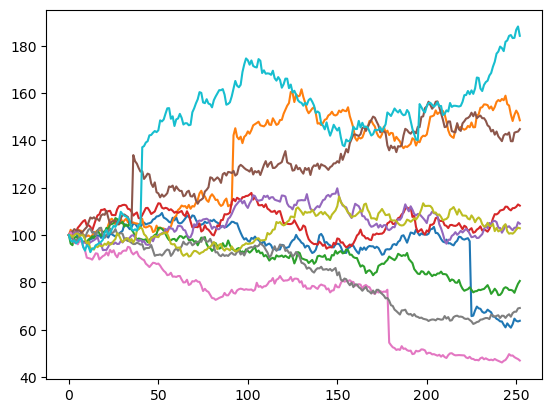

In [6]:
plt.plot(prices.T)
plt.show()

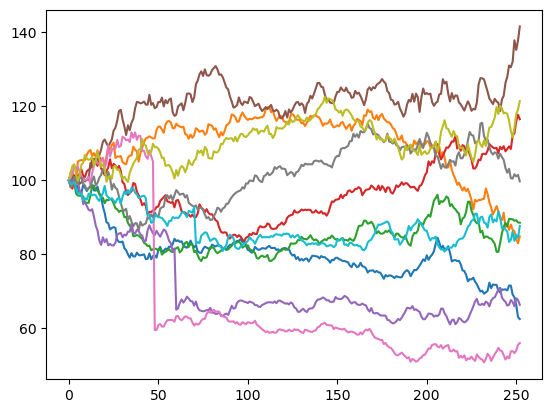

In [7]:
plt.plot(prices_tv.T)
plt.show()

## Heston Model

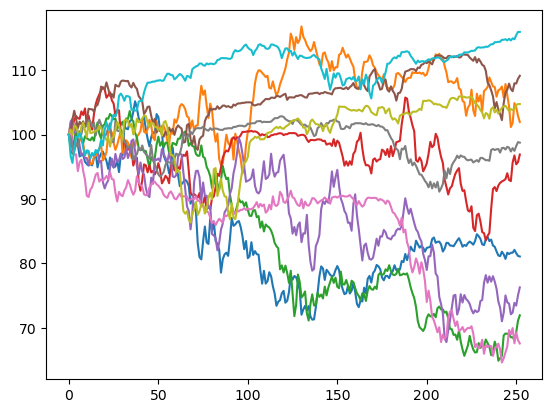

In [8]:
# 1) Constant parameters, 1-year daily steps
N, T, dt = 10, 252, 1/252
prices, _ = simulator.heston(
    N, T, dt,
    mu=0.0,            # risk-neutral: set to r - q if you like
    kappa=2.0,
    theta=0.04,
    xi=0.6,
    rho=-0.7,
    S0=100,
    v0=0.04,
    seed=42
)

plt.plot(prices.T)
plt.show()

## Variance Gamma Model

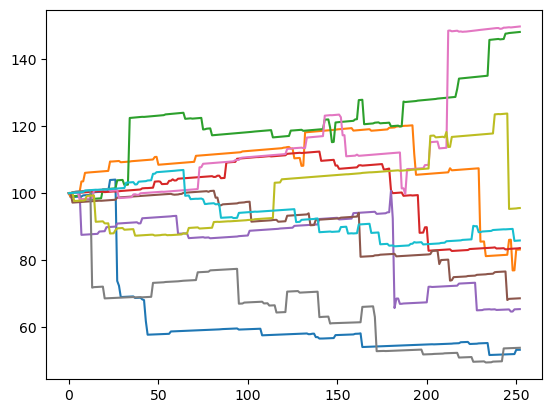

In [9]:
N, T, dt = 10, 252, 1/252
prices = simulator.variance_gamma(
    N, T, dt,
    S0=100, r=0.03, q=0.0,
    theta=-0.1, sigma=0.25, nu=0.2
)

plt.plot(prices.T)
plt.show()

## Garch Model

In [10]:
# 1) Plain GARCH(1,1) with normal shocks, constant mean
prices, _, _ = simulator.garch_ret(
    N=10, T=252,
    omega=1e-6, alpha=0.05, beta=0.94,
    mu=0.0, phi=0.0,
    dist="normal", S0=100, seed=42
)

# 2) AR(1)-GARCH with standardized Student-t shocks
prices_t, _, _ = simulator.garch_ret(
    N=10, T=252,
    omega=5e-6, alpha=0.07, beta=0.90,
    mu=0.0002, phi=0.15,
    dist="t", nu=7, S0=100, seed=7
)

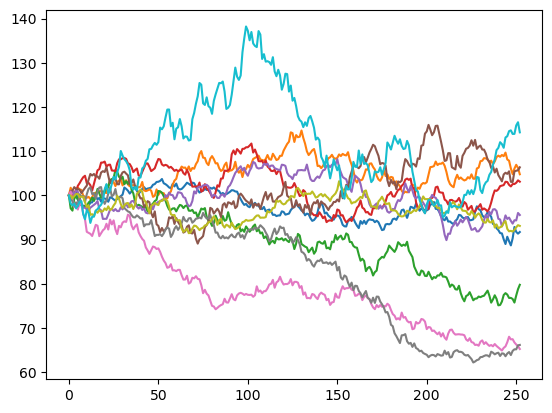

In [11]:
plt.plot(prices.T)
plt.show()

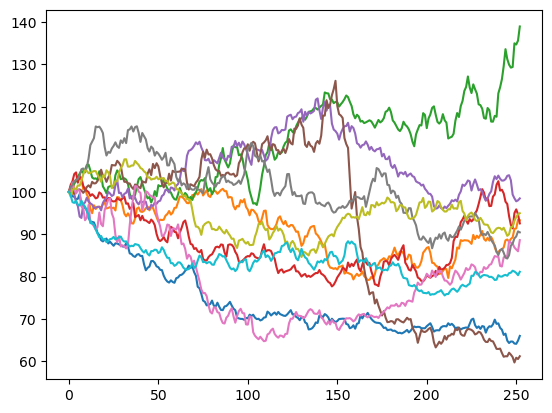

In [12]:
plt.plot(prices_t.T)
plt.show()